In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

from collections import Counter

from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression

In [36]:
df = pd.read_csv(r'C:\\Users\\hetko\\Desktop\\flight_data\\flights_done.csv')
#df = main_df.iloc[:1_000_000, :].copy()

In [3]:
df.head()

,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,DIVERTED,...,Airlines_NK,Airlines_OO,Airlines_UA,Airlines_US,Airlines_VX,Airlines_WN,AIR_ACRO_IN_NUM,DEST_AIR_ACRO_IN_NUM,DEPARTURE_TARGET,ARRIVAL_TARGET
0,4,-9,21,205,194,169,1448,4,-22,0,...,0,0,0,0,0,0,17,277,0,0
1,4,-8,12,280,279,263,2330,4,-9,0,...,0,0,0,0,0,0,176,235,1,0
2,4,-2,16,286,293,266,2296,11,5,0,...,0,0,0,1,0,0,278,66,1,1
3,4,-5,15,285,281,258,2342,8,-9,0,...,0,0,0,0,0,0,176,203,1,0
4,4,-1,11,235,215,199,1448,5,-21,0,...,0,0,0,0,0,0,277,17,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726566 entries, 0 to 5726565
Data columns (total 38 columns):
 #   Column                Dtype
---  ------                -----
 0   DAY_OF_WEEK           int64
 1   DEPARTURE_DELAY       int64
 2   TAXI_OUT              int64
 3   SCHEDULED_TIME        int64
 4   ELAPSED_TIME          int64
 5   AIR_TIME              int64
 6   DISTANCE              int64
 7   TAXI_IN               int64
 8   ARRIVAL_DELAY         int64
 9   DIVERTED              int64
 10  CANCELLED             int64
 11  AIR_SYSTEM_DELAY      int64
 12  SECURITY_DELAY        int64
 13  AIRLINE_DELAY         int64
 14  LATE_AIRCRAFT_DELAY   int64
 15  WEATHER_DELAY         int64
 16  Option_A              int64
 17  Option_B              int64
 18  Option_C              int64
 19  Option_D              int64
 20  Airlines_AA           int64
 21  Airlines_AS           int64
 22  Airlines_B6           int64
 23  Airlines_DL           int64
 24  Airlines_EV           in

In [37]:
y = df.pop('ARRIVAL_TARGET')

In [6]:
y.value_counts()

# zbior jest niezbalansowany, trzeba bedzie wprowadzic regularyzacje

0    3687672
1    2038894
Name: ARRIVAL_TARGET, dtype: int64

In [38]:
X = df

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
del df, X, y

In [10]:
Counter(y_train)

Counter({0: 2950228, 1: 1631024})

In [11]:

# Przez zbyt duzy zbior SMOTE jest nieuzyteczne

In [12]:
ros = RandomOverSampler(random_state=123)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [13]:
Counter(y_train)

Counter({0: 2950228, 1: 2950228})

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    737444
           1       0.97      0.97      0.97    407870

    accuracy                           0.98   1145314
   macro avg       0.98      0.98      0.98   1145314
weighted avg       0.98      0.98      0.98   1145314



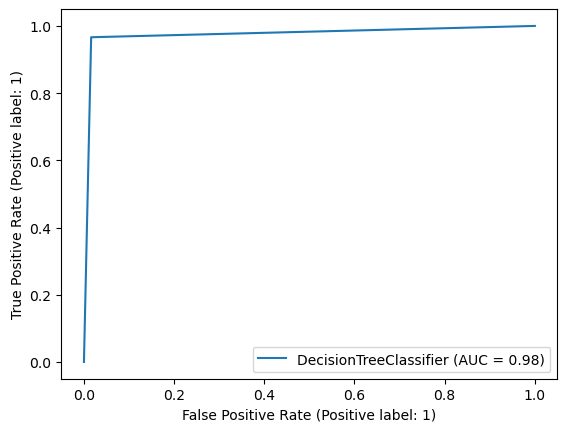

In [17]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)

In [18]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [19]:
df = pd.read_csv(r'C:\\Users\\hetko\\Desktop\\flight_data\\flights_done.csv')
y = df.pop('ARRIVAL_TARGET')
X = df

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins =5,
                       encode='ordinal',
                       strategy='uniform')

In [21]:
disc.fit(X) # pokazujemy zmienne X do disc 
X_disc = disc.transform(X) # dyskretyzujemy X
X_d = X.copy() # kopiujemy X
X_d[:] = X_disc # przypisujemy zdyskretyzowane dane

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:245: UserWarning: Feature 10 is constant and will be replaced with 0.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:245: UserWarning: Feature 16 is constant and will be replaced with 0.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:245: UserWarning: Feature 17 is constant and will be replaced with 0.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:245: UserWarning: Feature 18 is constant and will be replaced with 0.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:245: UserWarning: Feature 19 is constant and will be replaced with 0.
  warnings.warn(


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2, random_state=42)

In [23]:
del df, X, y

In [24]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [25]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84    737444
           1       0.69      0.81      0.75    407870

    accuracy                           0.81   1145314
   macro avg       0.79      0.81      0.79   1145314
weighted avg       0.82      0.81      0.81   1145314



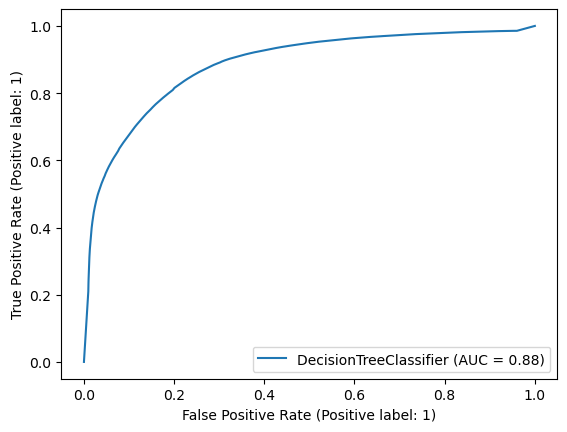

In [26]:
print(classification_report(y_test, y_pred))

RocCurveDisplay.from_estimator(dt, X_test, y_test)


<Axes: >

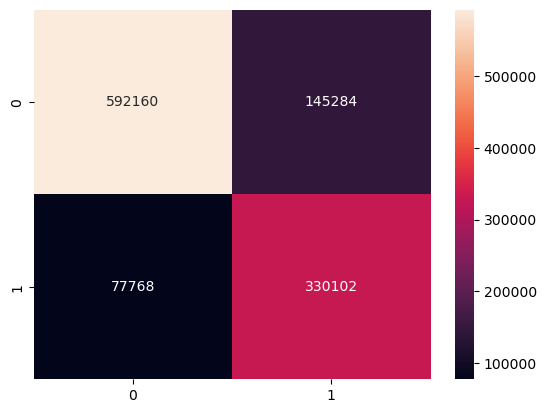

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [39]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
df = pd.read_csv(r'C:\\Users\\hetko\\Desktop\\flight_data\\flights_done.csv')
y = df.pop('ARRIVAL_TARGET')
X = df

In [30]:
disc2=KBinsDiscretizer(n_bins=3, # liczba przedziałów
                      encode='onehot', # wyświetlanie tabeli po transformacji one hot encoding
                      strategy='quantile') # tworzenie przedziałów, aby miały taką samą liczbę obserwacji

In [31]:
disc2.fit(X) # pokazujemy zmienne X do disc 
X_disc2 = disc2.transform(X) # dyskretyzujemy X
X_d = X.copy() # kopiujemy X
X_d[:] = X_disc2 # przypisujemy zdyskretyzowane dane

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:245: UserWarning: Feature 10 is constant and will be replaced with 0.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\hetko\anaconda3\lib\site-packages\sklearn\preproce

IndexError: tuple index out of range

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2, random_state=42)

In [33]:
del df, X, y

In [34]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [35]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    737444
           1       0.97      0.97      0.97    407870

    accuracy                           0.98   1145314
   macro avg       0.98      0.97      0.98   1145314
weighted avg       0.98      0.98      0.98   1145314



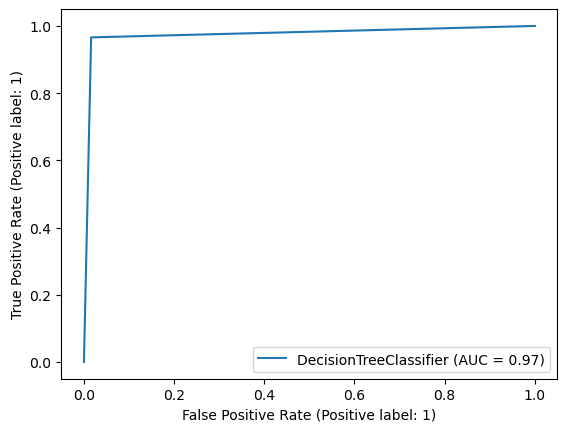

In [37]:
print(classification_report(y_test, y_pred))

RocCurveDisplay.from_estimator(dt, X_test, y_test)


<Axes: >

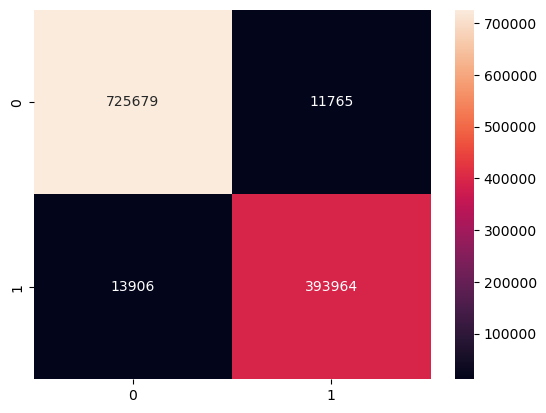

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
# z powodu zbyt duzej mocy obliczeniowej odpuszczamy ten model

# from sklearn.ensemble import BaggingClassifier 

# bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
# bagging_model.fit(X_train, y_train)

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# z powodu zbyt duzej mocy obliczeniowej odpuszczamy ten model
# from sklearn.esamble import RandomForestClassifier 

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
# rf_model.fit(X_train, y_train)

In [2]:
df = pd.read_csv(r'C:\\Users\\hetko\\Desktop\\flight_data\\flights_done.csv')
y = df.pop('ARRIVAL_TARGET')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

del df, X, y

# balansowanie
ros = RandomOverSampler(random_state=123)
X_train, y_train = ros.fit_resample(X_train, y_train)


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
ss = StandardScaler()

X_train_stand = ss.fit_transform(X_train)
X_test_stand = ss.fit_transform(X_test)

RangeIndex(start=0, stop=5726566, step=1)

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = model.predict(X_test)

<Axes: >

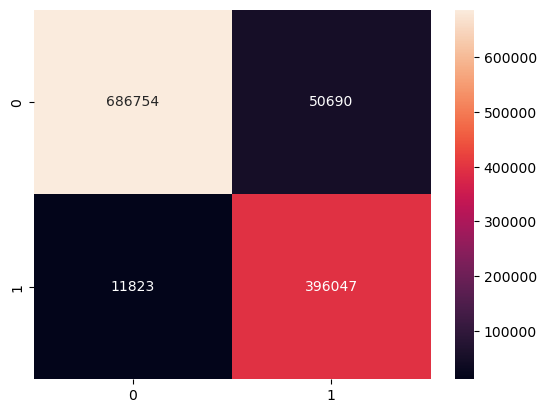

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96    737444
           1       0.89      0.97      0.93    407870

    accuracy                           0.95   1145314
   macro avg       0.93      0.95      0.94   1145314
weighted avg       0.95      0.95      0.95   1145314



In [49]:
roc_auc_score(y_test, y_pred)

0.9511376999696612

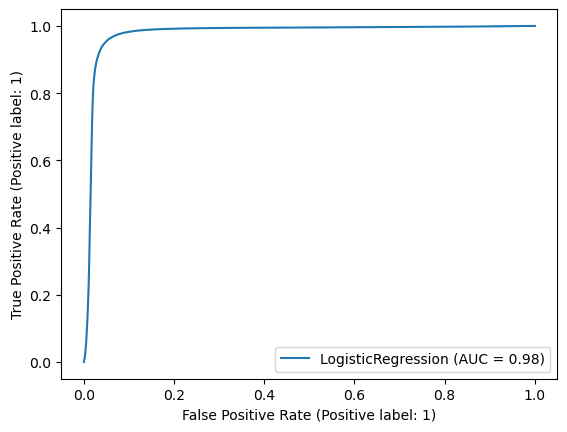

In [50]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [ ]:
model.fit(X_train_stand, y_train)

In [19]:
#del model

In [20]:
# REGULARYZACJA
# model_l1 = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)
# model_l1.fit(X_train, y_train)

In [5]:
from sklearn.svm import LinearSVC

In [6]:
svm = LinearSVC()

In [ ]:
svm.fit(X_train_stand, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
#RocCurveDisplay.from_estimator(svm, X_test, y_test)

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
params = {'C':[0.001, 0.01, 0.1, 1]}
          

In [ ]:
searcher = GridSearchCV(svm, params, cv=5)
searcher.fit(X_train, y_train)

In [ ]:
sercher.best_params_
sercher.best_score_

In [6]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [10]:
gb = GaussianNB()
gb.fit(X_train_stand, y_train)

GaussianNB()

In [11]:
y_pred = gb.predict(X_test)

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81    737444
           1       0.87      0.21      0.34    407870

    accuracy                           0.71   1145314
   macro avg       0.78      0.60      0.58   1145314
weighted avg       0.75      0.71      0.64   1145314



C:\Users\hetko\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


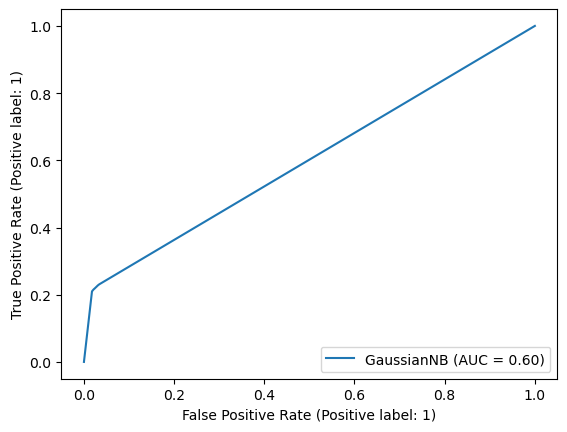

In [13]:
RocCurveDisplay.from_estimator(gb, X_test, y_test)

In [14]:
bn = BernoulliNB()
bn.fit(X_train_stand, y_train)

BernoulliNB()

In [15]:
y_pred = bn.predict(X_test)

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    737444
           1       0.75      0.99      0.85    407870

    accuracy                           0.88   1145314
   macro avg       0.87      0.90      0.88   1145314
weighted avg       0.91      0.88      0.88   1145314



C:\Users\hetko\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


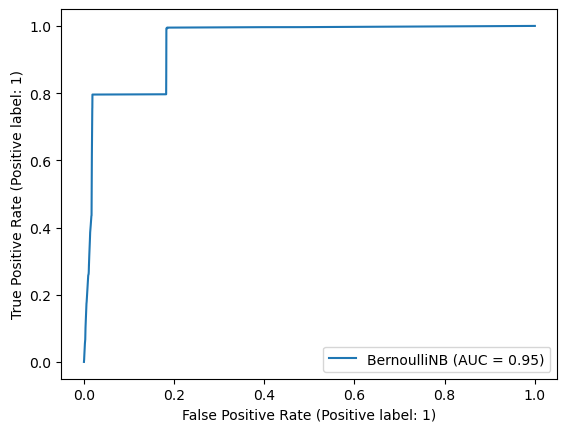

In [17]:
RocCurveDisplay.from_estimator(bn, X_test, y_test)

In [25]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_train_normal = mm_scaler.fit_transform(X_train)
X_test_normal = mm_scaler.fit_transform(X_test)

In [ ]:
# zbyt dlugi czas obliczen

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [ ]:
SIECI NEURONOWE

In [20]:
!pip install keras

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)


In [22]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 1.0 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 4.1/4.1 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.3/1.3 MB 6.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished 

In [26]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=X_train_normal.shape[1]))
model.add(Dense(1, activation='sigmoid')) 

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4864      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [29]:
hist = model.fit(X_train_normal, y_train, validation_data=(X_test_normal, y_test), epochs=10, batch_size=100, callbacks=[es])

Epoch 1/10
59005/59005 [==============================] - 93s 2ms/step - loss: 0.1210 - accuracy: 0.9745 - val_loss: 0.0935 - val_accuracy: 0.9765
Epoch 2/10
59005/59005 [==============================] - 90s 2ms/step - loss: 0.0797 - accuracy: 0.9828 - val_loss: 0.0811 - val_accuracy: 0.9798
Epoch 3/10
59005/59005 [==============================] - 91s 2ms/step - loss: 0.0716 - accuracy: 0.9852 - val_loss: 0.0733 - val_accuracy: 0.9824
Epoch 4/10
59005/59005 [==============================] - 90s 2ms/step - loss: 0.0672 - accuracy: 0.9863 - val_loss: 0.0707 - val_accuracy: 0.9849
Epoch 5/10
59005/59005 [==============================] - 91s 2ms/step - loss: 0.0640 - accuracy: 0.9869 - val_loss: 0.0656 - val_accuracy: 0.9852
Epoch 6/10
59005/59005 [==============================] - 92s 2ms/step - loss: 0.0619 - accuracy: 0.9874 - val_loss: 0.0614 - val_accuracy: 0.9860
Epoch 7/10
59005/59005 [==============================] - 92s 2ms/step - loss: 0.0604 - accuracy: 0.9875 - val_loss: 0

[]

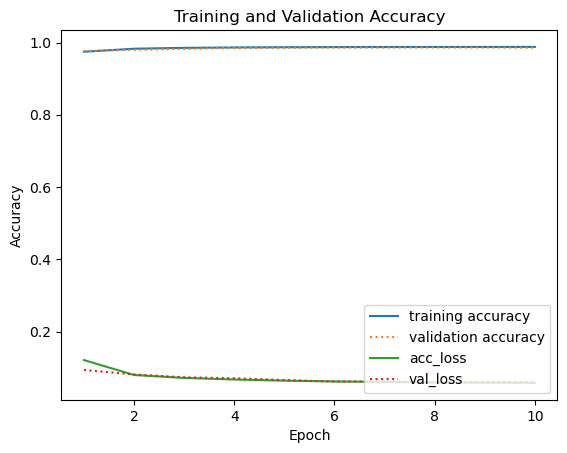

In [30]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='training accuracy')
plt.plot(epochs, val, ':', label='validation accuracy')
plt.plot(epochs, loss, '-', label='acc_loss')
plt.plot(epochs, val_loss, ':', label='val_loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=30)
ada_model.fit(X_train, y_train)

In [ ]:
y_pred = ada_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(ada_model, X_test, y_test)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
grad_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = grad_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
RocCurveDisplay.from_estimator(ada_model, X_test, y_test)

In [34]:
# REDUKCJA WYMIAROWOŚCI (ml_nienadzorowane_16.04 - PCA)
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [35]:
from scipy.stats import pearsonr

In [40]:
model = PCA()
pca_features = model.fit_transform(X)

In [41]:
len(pca_features[0])

37

Text(0, 0.5, 'Variance')

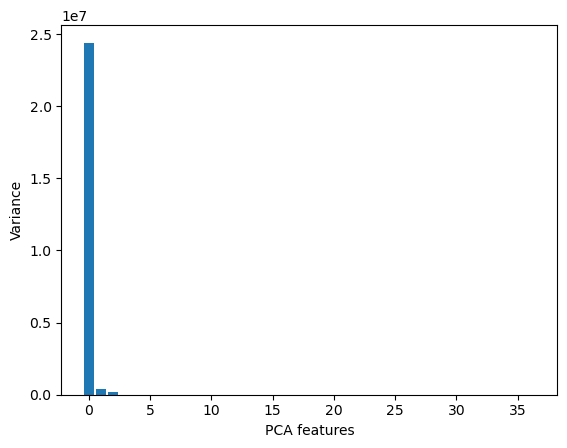

In [42]:
# szukamy zmiennych które w dużym stopniu opisują wariancje
features=range(model.n_components_)
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA features')
plt.ylabel('Variance')


In [61]:
# redukcja wymiaru

scaler = StandardScaler()
scaler.fit(X_train)

X_scal=scaler.transform(X_train)

In [62]:
# definuiujemy PCA z 4 komponentami
pca=PCA(n_components=4)
pca.fit(X_scal)


PCA(n_components=4)

In [63]:
pca_features = pca.transform(X_scal)

In [64]:
# wyświetl rozmiar zbioru po redukcji wymiarów
print(pca_features.shape)

(5900456, 4)


In [48]:
pca_features.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [65]:
pca_df = pd.DataFrame(pca_features)

In [66]:
pca_df.index

RangeIndex(start=0, stop=5900456, step=1)

In [67]:
y_train.index

RangeIndex(start=0, stop=5900456, step=1)

In [68]:
model = LogisticRegression()
model.fit(pca_df, y_train)

LogisticRegression()

In [69]:
y_pred = model.predict(X_test)

C:\Users\hetko\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 37 features, but LogisticRegression is expecting 4 features as input.